In [2]:
import pandas as pd

# pd.read_csv('xxxxx.csv')
pd.set_option("display.max_columns", None)

from bs4 import BeautifulSoup
import requests

import time
import re



step1.
## Scrape [Nathan Chen](https://en.wikipedia.org/wiki/Nathan_Chen)'s wikipedia page

In [3]:
response = requests.get(
url="https://en.wikipedia.org/wiki/Nathan_Chen",
)
print(response.status_code)

200


In [4]:
#Find a table
doc = BeautifulSoup(response.content, 'html.parser')
music = doc.find('table', {"class":"wikitable"})

In [5]:
# scrape a table 
# df= pd.read_html(str(music))
# chen=pd.DataFrame(df[0])
# chen.head()

But this table is not what I want...  
(all the music data are combined together)

In [6]:

music.find_all("tr")[1]("th")[0].get_text(strip=True)


'2021–2022[148]'

In [7]:
music.find_all("ul")[1]

<ul><li>Eternity</li>
<li>Nemesis <br/><span style="font-size:85%;"> by <a href="/wiki/Benjamin_Clementine" title="Benjamin Clementine">Benjamin Clementine</a> <br/> choreo. by <a href="/wiki/Shae-Lynn_Bourne" title="Shae-Lynn Bourne">Shae-Lynn Bourne</a> </span></li></ul>

In [8]:
music_lst = music.find_all("ul")
title_url = [] 
for mus in music_lst:
    titles = mus.find("li")
    title_url.append(titles)
title_url[0].find("a")["href"]

'/wiki/La_Boh%C3%A8me_(Charles_Aznavour_song)'

In [9]:
title = []
urls =[]
for msc in title_url:
    try:
        ttl = msc.find("a").text
        title.append(ttl)
    except:
        title.append(msc.text)
for msc in title_url:
    try:
        ur = msc.find("a")["href"]
        urls.append(ur)
    except:
        urls.append("NaN")

zipped = list(zip(title, urls))
chen_df = pd.DataFrame(zipped, columns=['title', 'url'])
chen_df.head()


,title,url
0,La Bohème,/wiki/La_Boh%C3%A8me_(Charles_Aznavour_song)
1,Eternity,NaN
2,Goodbye Yellow Brick Road,/wiki/Goodbye_Yellow_Brick_Road
3,Piano Concerto No. 23,/wiki/Piano_Concerto_No._23_(Mozart)
4,The Nights,/wiki/The_Nights


In [10]:
chen_df.to_csv('chen.csv', index=False)


## For Yuma Kagiyama

In [11]:
response_2 = requests.get(
url ="https://en.wikipedia.org/wiki/Yuma_Kagiyama",
)
doc_2 = BeautifulSoup(response_2.content, 'html.parser')
music_2 = doc_2.find('table', {"class":"wikitable"})


In [12]:
music_lst2 = music_2.find_all("ul")
title_url2 = [] 
for mus2 in music_lst2:
    titles2 = mus2.find("li")
    title_url2.append(titles2)
title_url2[0]

<li><a href="/wiki/When_You%27re_Smiling" title="When You're Smiling">When You're Smiling</a> <br/> <span style="font-size:85%;">by <a href="/wiki/Michael_Bubl%C3%A9" title="Michael Bublé">Michael Bublé</a> <br/> choreo. by <a href="/wiki/Lori_Nichol" title="Lori Nichol">Lori Nichol</a> </span></li>

In [13]:
title2 = []
urls2 =[]
for msc2 in title_url2:
    try:
        ttl2 = msc2.find("a").text
        title2.append(ttl2)
    except:
        title2.append(msc2.text)
for msc2 in title_url2:
    try:
        ur2 = msc2.find("a")["href"]
        urls2.append(ur2)
    except:
        urls2.append("NaN")

zipped2 = list(zip(title2, urls2))
kagi_df = pd.DataFrame(zipped2, columns=['title', 'url'])
kagi_df

,title,url
0,When You're Smiling,/wiki/When_You%27re_Smiling
1,Lang Lang,/wiki/Lang_Lang
2,Sandeep Das,/wiki/Sandeep_Das
3,Sandeep Das,/wiki/Sandeep_Das
4,Avatar,/wiki/Avatar_(2009_film)
5,The Lord of the Rings,/wiki/Music_of_The_Lord_of_the_Rings_film_series
6,Take Five,/wiki/Take_Five
7,Castle of Sand,/wiki/Castle_of_Sand
8,Speedway,NaN
9,Uptown Funk,/wiki/Uptown_Funk


In [14]:
kagi_df.to_csv('kagiyama.csv', index=False)

In [15]:
# Second attempt

music_lst2 = music_2.find_all("li")
title2 = []
urls2 =[]
for msc2 in music_lst2:
    try:
        ttl2 = msc2.find.text
        title2.append(ttl2)
    except:
        title2.append(msc2.text)
for msc2 in music_lst2:
    try:
        ur2 = msc2.find("a")["href"]
        urls2.append(ur2)
    except:
        urls2.append("NaN")

        zipped2 = list(zip(title2, urls2))
kagi_df2 = pd.DataFrame(zipped2, columns=['title', 'url'])
kagi_df2
# kagi_df2.to_csv("uno2.csv")

,title,url
0,When You're Smiling by Michael Bublé choreo....,/wiki/When_You%27re_Smiling
1,Gladiator Rhapsodyfeat. Lang Lang by Hans Zim...,/wiki/Lang_Lang
2,Nelle tue mani (Now We Are Free) by Lisa Gerr...,/wiki/Cinema_(Andrea_Bocelli_album)
3,Vocussion (from New Impossibilities)by Sandee...,/wiki/Sandeep_Das
4,Vocussion (from New Impossibilities)by Sandee...,/wiki/Sandeep_Das
5,Avatar by James Horner choreo. by Lori Nichol,/wiki/Avatar_(2009_film)
6,The Lord of the Ringsby Howard Shorechoreo. by...,/wiki/Music_of_The_Lord_of_the_Rings_film_series
7,Take Five by The Dave Brubeck Quartet choreo....,/wiki/Take_Five
8,"Piano Concerto ""Fate"" (from Castle of Sand) ...",/wiki/Castle_of_Sand
9,Speedway,NaN


In [16]:
kagi_df2['title2'] = kagi_df2.title.str.extract('(.*?)\s+by.*')
kagi_df2.head()
kagi_df2.to_csv('kagi2.csv', index=False)

In [17]:
# scrape genre

In [18]:
kagi_gr = pd.read_csv('kagi_dw.csv')
pd.set_option("display.max_columns", None)
kagi_gr

,season,program,title,url
0,2021–2022,SP,When You're Smiling,/wiki/When_You%27re_Smiling
1,2021–2022,FS,Gladiator Rhapsodyfeat. Lang Lang,/wiki/Lang_Lang
2,2021–2022,FS,Nelle tue mani (Now We Are Free),/wiki/Cinema_(Andrea_Bocelli_album)
3,2020–2021,SP,Vocussion (from New Impossibilities)by Sandee...,/wiki/Sandeep_Das
4,2020–2021,FS,Avatar,/wiki/Avatar_(2009_film)
5,2020–2021,FS,The Lord of the Ringsby Howard Shorechoreo.,/wiki/Music_of_The_Lord_of_the_Rings_film_series
6,2019–2020,SP,"Piano Concerto ""Fate"" (from Castle of Sand)",/wiki/Castle_of_Sand
7,2019–2020,FS,Speedway,/wiki/Tucker_(soundtrack)
8,2019–2020,FS,The Trial,/wiki/Tucker_(soundtrack)
9,2019–2020,FS,Toast of the Town,/wiki/Tucker_(soundtrack)


Step 3
## Shoma Uno

In [19]:
response_3 = requests.get(
url ="https://en.wikipedia.org/wiki/Shoma_Uno",
)
doc_3 = BeautifulSoup(response_3.content, 'html.parser')
music_3 = doc_3.find('table', {"class":"wikitable"})



In [20]:
music_lst3 = music_3.find_all("li")

title3 = []
urls3 =[]
for msc3 in music_lst3:
    try:
        ttl3 = msc3.find("a").text
        title3.append(ttl3)
    except:
        title3.append(msc3.text)
for msc3 in music_lst3:
    try:
        ur3 = msc3.find("a")["href"]
        urls3.append(ur3)
    except:
        urls3.append("NaN")


        
zipped3 = list(zip(title3, urls3))
uno_df = pd.DataFrame(zipped3, columns=['title', 'url'])
uno_df

,title,url
0,Oboe Concerto,/wiki/Oboe_Concerto_(Marcello)
1,Antonio Vivaldi,/wiki/Antonio_Vivaldi
2,Boléro,/wiki/Bol%C3%A9ro
3,Great Spirit,/wiki/Armin_van_Buuren_discography
4,[67],#cite_note-OurLifeFinal-67
5,Dancing on My Own,/wiki/Dancing_on_My_Own
6,David Wilson,/wiki/David_Wilson_(figure_skating)
7,Oboe Concerto,/wiki/Oboe_Concerto_(Marcello)
8,Antonio Vivaldi,/wiki/Antonio_Vivaldi
9,See You Again,/wiki/See_You_Again_(Wiz_Khalifa_song)


In [21]:
uno_df.to_csv('uno.csv', index=False)

In [22]:
music_lst4 = music_3.find_all("li")
title4 = []
urls4 =[]
for msc4 in music_lst3:
    try:
        ttl4 = msc4.find.text
        title4.append(ttl4)
    except:
        title4.append(msc4.text)
for msc4 in music_lst4:
    try:
        ur4 = msc4.find("a")["href"]
        urls4.append(ur4)
    except:
        urls4.append("NaN")

        zipped4 = list(zip(title4, urls4))
uno_df2 = pd.DataFrame(zipped4, columns=['title', 'url'])
uno_df2.to_csv("uno2.csv")

In [23]:
#second attenmpt (might be easier???)
uno_df2['title2'] = uno_df2.title.str.extract('(.*?)\s+by.*')
uno_df2.head()
uno_df.to_csv('uno.csv', index=False)

# Now scrape genres of each song title!
### First, try Kagiyama's list

In [24]:
kagi_list = pd.read_csv('kagi_dw.csv')
pd.set_option("display.max_columns", None)


In [25]:
kagi_list['url_list'] = "https://en.wikipedia.org/" + kagi_list.url
kagi_list.head()

,season,program,title,url,url_list
0,2021–2022,SP,When You're Smiling,/wiki/When_You%27re_Smiling,https://en.wikipedia.org//wiki/When_You%27re_S...
1,2021–2022,FS,Gladiator Rhapsodyfeat. Lang Lang,/wiki/Lang_Lang,https://en.wikipedia.org//wiki/Lang_Lang
2,2021–2022,FS,Nelle tue mani (Now We Are Free),/wiki/Cinema_(Andrea_Bocelli_album),https://en.wikipedia.org//wiki/Cinema_(Andrea_...
3,2020–2021,SP,Vocussion (from New Impossibilities)by Sandee...,/wiki/Sandeep_Das,https://en.wikipedia.org//wiki/Sandeep_Das
4,2020–2021,FS,Avatar,/wiki/Avatar_(2009_film),https://en.wikipedia.org//wiki/Avatar_(2009_film)


In [26]:
kagi_url = kagi_list.url_list.tolist()

In [27]:
import time
#TRY
# class_ ="infobox-data category hlist"
url = "https://en.wikipedia.org/wiki/Cinema_(Andrea_Bocelli_album)"
r = requests.get(url)
time.sleep(2)
soup = BeautifulSoup(r.content, "html.parser")
soup.find(class_ ="infobox-data category hlist").text



'Traditional popvocal'

In [28]:
kagi_genre = []
for ur in kagi_url:
    try:
        url = ur
        r = requests.get(url)
        time.sleep(0.5)
        soup = BeautifulSoup(r.content, "html.parser")
        genre = soup.find(class_ ="infobox-data category hlist").text
        kagi_genre.append(genre)
    except:
        kagi_genre.append("NaN")
kagi_genre


        

['NaN',
 'NaN',
 'Traditional popvocal',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'Rock',
 'Rock',
 'Rock',
 'Jump blues',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN']

In [29]:
kagi_list['genre'] = kagi_genre
kagi_list.head()
kagi_list.to_csv('kagi_list.csv',index=False) 


## Uno's list


In [30]:
uno_list = pd.read_csv('uno_dw.csv')
pd.set_option("display.max_columns", None)
uno_list['url_list'] = "https://en.wikipedia.org/" + uno_list.url
uno_list.head()


,Season,Program,title,url,url_list
0,2021-2022,SP,Oboe Concerto,/wiki/Oboe_Concerto_(Marcello),https://en.wikipedia.org//wiki/Oboe_Concerto_(...
1,2021-2022,FS,Bol?ro,/wiki/Bol%C3%A9ro,https://en.wikipedia.org//wiki/Bol%C3%A9ro
2,2020-2021,SP,Great Spirit,/wiki/Armin_van_Buuren_discography,https://en.wikipedia.org//wiki/Armin_van_Buure...
3,2020-2021,FP,Our Life,NaN,NaN
4,2020-2021,FP,Dancing on My Own,/wiki/Dancing_on_My_Own,https://en.wikipedia.org//wiki/Dancing_on_My_Own


In [31]:
uno_url = uno_list.url_list.tolist()
uno_genre = []
for ur in uno_url:
    try:
        url = ur
        r = requests.get(url)
        time.sleep(0.5)
        soup = BeautifulSoup(r.content, "html.parser")
        genre = soup.find(class_ ="infobox-data category hlist").text
        genre2 = genre.replace("\n",",")
        uno_genre.append(genre2)
    except:
        uno_genre.append("NaN")
uno_genre


['NaN',
 'NaN',
 'NaN',
 'NaN',
 ',Electropop[1] (Album version),Synth-pop[2] (Radio edit),Acoustic[3] (Live Lounge),',
 'NaN',
 'NaN',
 'NaN',
 ',Electropop[1] (Album version),Synth-pop[2] (Radio edit),Acoustic[3] (Live Lounge),',
 'NaN',
 ',Progressive rock,folk rock,hard rock,',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'Classical',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'Rock',
 'NaN',
 'NaN']

In [32]:
uno_list['genre'] = uno_genre
uno_list.head()
uno_list.to_csv('uno_list.csv',index=False) 

## Chen's list


In [33]:
chen_list = pd.read_csv('chen_dw.csv')
pd.set_option("display.max_columns", None)
chen_list['url_list'] = "https://en.wikipedia.org/" + chen_list.url
chen_list.head()


,season,program,title,url,url_list
0,2021-2022,SP,La Bohème,/wiki/La_Boh%C3%A8me_(Charles_Aznavour_song),https://en.wikipedia.org//wiki/La_Boh%C3%A8me_...
1,2021-2022,SP,Eternity,NaN,NaN
2,2021-2022,SP,Nemesis,NaN,NaN
3,2021-2022,FS,Goodbye Yellow Brick Road,/wiki/Goodbye_Yellow_Brick_Road,https://en.wikipedia.org//wiki/Goodbye_Yellow_...
4,2021-2022,FS,Rocketman,/wiki/Rocket_Man_(song),https://en.wikipedia.org//wiki/Rocket_Man_(song)


In [34]:
chen_url = chen_list.url_list.tolist()
chen_genre = []
for ur in chen_url:
    try:
        url = ur
        r = requests.get(url)
        time.sleep(0.5)
        soup = BeautifulSoup(r.content, "html.parser")
        genre = soup.find(class_ ="infobox-data category hlist").text
        genre2 = genre.replace("\n",",")
        chen_genre.append(genre2)
    except:
        chen_genre.append("NaN")
chen_genre


['Chanson',
 'NaN',
 'NaN',
 'Pop rock[1]',
 'Rock',
 'Glam rock[1]',
 'NaN',
 'NaN',
 'NaN',
 'Chicano rockRancheraRockPop',
 'Minimalism',
 'NaN',
 'NaN',
 'Chanson',
 'Pop rock[1]',
 'Rock',
 'Glam rock[1]',
 'Latin',
 'Jazz',
 'NaN',
 'Rock opera, spoken word, classical, chamber pop, art pop',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'Soul',
 ',Pop[3],R&B[3],',
 'NaN',
 'Soul',
 ',Pop[3],R&B[3],',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'Jazz',
 'NaN',
 'NaN',
 'Soundtrack',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN']

In [35]:
chen_list['genre'] = chen_genre
chen_list.head()
chen_list.to_csv('chen_list.csv',index=False) 

## Analyze music genres of Chen's list

In [38]:
chen_genre = pd.read_csv('chen_list_final.csv')
chen_genre.head()

,season,program,title,url,url_list,genre,vocal
0,2021-2022,SP,La Bohème,/wiki/La_Boh%C3%A8me_(Charles_Aznavour_song),https://en.wikipedia.org//wiki/La_Boh%C3%A8me_...,Chanson,vocal
1,2021-2022,SP,Eternity,NaN,NaN,Alternative/Indie,vocal
2,2021-2022,SP,Nemesis,NaN,NaN,Alternative/Indie,vocal
3,2021-2022,FS,Goodbye Yellow Brick Road,/wiki/Goodbye_Yellow_Brick_Road,https://en.wikipedia.org//wiki/Goodbye_Yellow_...,Rock,vocal
4,2021-2022,FS,Rocketman,/wiki/Rocket_Man_(song),https://en.wikipedia.org//wiki/Rocket_Man_(song),Rock,vocal


<AxesSubplot:>

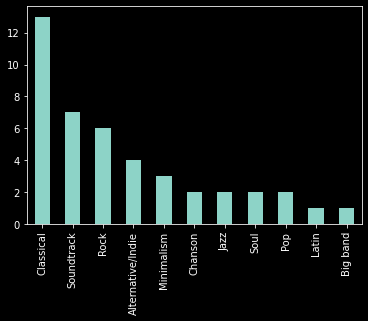

In [43]:
import matplotlib.pyplot as plt 
plt.style.use('dark_background')

chen_genre.genre.value_counts().plot(kind='bar')

In [46]:
from plotnine import ggplot, aes, geom_point, geom_bar, labs, theme_bw, facet_wrap, geom_smooth, stat_smooth,coord_cartesian



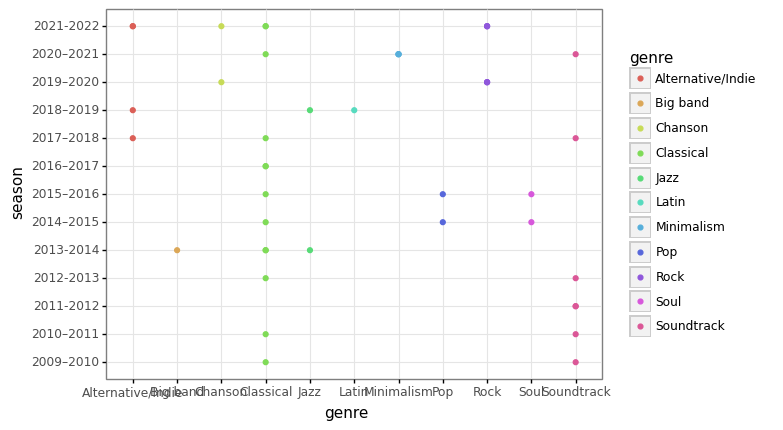

<ggplot: (184585490940)>

In [72]:
(
    ggplot(chen_genre,                   # data
        aes('genre', 'season', 
            color = 'genre'))        # aesthetics
        + geom_point()               # geometry
        + theme_bw()
        
#         + labs(
#             title = "Cars with big engines tend to be less efficient",
#             y = "engine displacement (cu.in.)",
#             x = "fuel efficiency (mpg)"
#         )
)   

